# <font color='blue'>Introduction:</font> 
**Performing an A/B Testing to check does launching new page makes more users more likley to pay or not**
**but firstly, we need to walk through data set**

**Importing important libraries and **uploading data****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('ab_data.csv')

**Wrangling and Exploring the data set**

In [2]:
df.head() #gives us an overview of data_frame

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.isnull().sum() #Checking for null values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**timestamp's type is object we shall change it for usage later**

In [4]:
df.info() #Checking for data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
#Checking unique values
Columns = ['group','landing_page','converted'] 
for c in Columns:
    Uni = df[c].unique()
    print(' ')
    print (c)
    print (Uni)

 
group
['control' 'treatment']
 
landing_page
['old_page' 'new_page']
 
converted
[0 1]


**number of inaccurate landing pages for  <font color='blue'>control and tretment groups</font> is too much to be easily dropped so we will firstly check if there is any pataren that we can use to solve them**

In [6]:
df.query("group == 'control' & landing_page == 'new_page'").head() #Control inaccurate rows

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1


In [7]:
#Length of inaccurate landing pages
print('number of inaccurate landing pages for control group: '+str(len(df['landing_page'].iloc[df.query("group == 'control' & landing_page == 'new_page' ").index.values.tolist()])))

number of inaccurate landing pages for control group: 1928


In [8]:
df.query("group == 'treatment' & landing_page == 'old_page'").head() #Treatment inaccurate rows

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0


In [9]:
#Length of inaccurate landing pages
print('number of inaccurate landing pages for treatment group: '+str(len(df['landing_page'].iloc[df.query("group == 'treatment' & landing_page == 'old_page'").index.values.tolist()])))

number of inaccurate landing pages for treatment group: 1965


In [10]:
df.shape #finidng shape of data_frame

(294478, 5)

In [11]:
df['user_id'].nunique() #checking number of users

290584

**After checking group and landing page features we found that both is inaccurate so we are not able to fix innacurate rows so the best choice is to drop them**

In [12]:
pop1 = df.pop('timestamp')
pop3 = df.pop('landing_page')
pop4 = df.pop('converted')

In [13]:
df[df.duplicated()]

,user_id,group
2656,698120,control
2893,773192,treatment
8036,790934,treatment
10218,633793,treatment
11215,839784,treatment
...,...,...
293917,738357,treatment
293980,916033,treatment
293996,942612,control
294309,787083,control


**Selecting a random value to check if we re-assigned landing page to data frame what would change group or landing page**

In [14]:
df.loc[df[df['user_id']==787083].index.values]

,user_id,group
182156,787083,control
294309,787083,control


In [15]:
df.insert(2, 'landing_page', pop3) #re-assigning landing page colunm to data frame

In [16]:
df[df.duplicated()]

,user_id,group,landing_page
2893,773192,treatment,new_page


**As we can we see the change occures in landing page**

In [17]:
df.loc[df[df['user_id']==787083].index.values]

,user_id,group,landing_page
182156,787083,control,new_page
294309,787083,control,old_page


**doing the same process for landing page**

In [18]:
pop2 = df.pop('group')

In [19]:
df[df.duplicated()]

,user_id,landing_page
2893,773192,new_page
7500,899953,new_page
11428,926754,new_page
12858,793494,old_page
13262,892450,old_page
...,...,...
294252,892498,old_page
294253,886135,new_page
294308,905197,new_page
294328,641570,old_page


In [20]:
df.insert(1, 'group', pop2)

In [21]:
df.loc[df[df['user_id']==892450].index.values]

,user_id,group,landing_page
10234,892450,control,old_page
13262,892450,treatment,old_page


**dropping inaccurate rows**

In [22]:
df = df.drop(df['landing_page'].iloc[df.query("group == 'control' & landing_page == 'new_page' ").index.tolist()].index.tolist() + df['landing_page'].iloc[df.query("group == 'treatment' & landing_page == 'old_page'").index.tolist()].index.tolist())


In [23]:
df = df.drop_duplicates() #droping duplicates
df.insert(1, 'timestamp', pop1) #re-assigning timestamp colunm to data frame
df.insert(4, 'converted', pop4) #re-assigning converted colunm to data frame

In [24]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**The proportion of users converted**

In [25]:
print('The proportion of users converted is: ' + str(df.query("converted == 1").count()[0] / (df.query("converted == 1").count()[0] + df.query("converted == 0").count()[0])*100) + '%')

The proportion of users converted is: 11.959708724499627%


**Given that an individual was in the control group, what is the probability they converted?**

In [26]:
P1 = df.query("group == 'control' & converted == 1 ").shape[0]/df.query("group == 'control'").shape[0]*100
P1

12.03863045004612

**Given that an individual was in the treatment group, what is the probability they converted?**

In [27]:
P2 = df.query("group == 'treatment' & converted == 1 ").shape[0]/df.query("group == 'treatment'").shape[0]*100
P2

11.880806551510565

**What is the probability that an individual received the new page?**

In [28]:
df.query("landing_page == 'new_page'").shape[0]/df.shape[0]

0.5000619442226688

In [29]:
print("the conversion difference is " + str(P1-P2) + " so it seems like control and treatment to be the same but we can't judge,yet")

the conversion difference is 0.15782389853555578 so it seems like control and treatment to be the same but we can't judge,yet


# Null Hypothesis  𝐻0  Testing:
<br><br>
<center>We assume that<br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$<br><br>
<center>Set α = 0.05
   

**Use built in function https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html cuase boost trapping takes a long time to simulate**

**Then we found out our confidence fails in 0.9050583127590245 which makes us fail to reject the null**

In [30]:
import statsmodels.api as sm
# filling the data for sm proportions_ztest
convert_old = df.query("group == 'control' & converted == 1 ").shape[0]
convert_new = df.query("group == 'treatment' & converted == 1 ").shape[0]
n_old = df.query("group == 'control'").shape[0]
n_new = df.query("group == 'treatment'").shape[0]

In [31]:
stat, pval = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative= 'larger') #larger
stat, pval

(1.3109241984234394, 0.09494168724097551)

In [32]:
stat, pval = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative= 'smaller') #smaller
stat, pval

(1.3109241984234394, 0.9050583127590245)

# A regression approach
we will add country feature which may has an effect 

In [36]:
df_country = pd.read_csv('countries.csv').pop('country')
df.insert(1, 'country', df_country)
df.head()

,user_id,country,timestamp,group,landing_page,converted
0,851104,UK,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,US,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,UK,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,UK,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,UK,2017-01-21 01:52:26.210827,control,old_page,1


**Feature engineering: Mutual Information https://www.kaggle.com/ryanholbrook/mutual-information**

In [37]:
X = df.copy()
y = X.pop("converted")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [38]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

group        0.001132
timestamp    0.000000
Name: MI Scores, dtype: float64

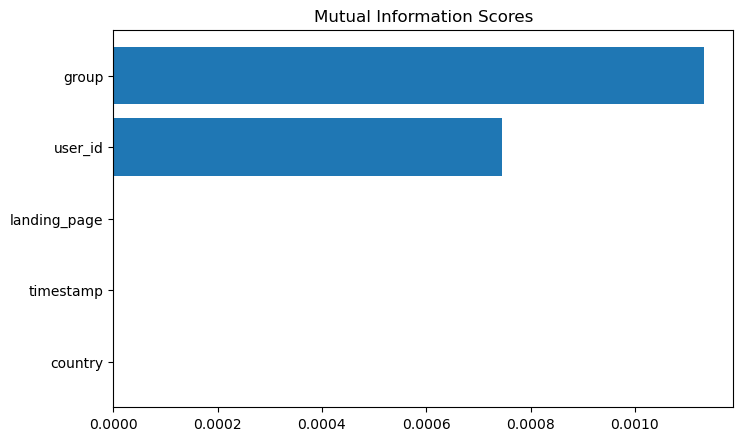

In [39]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Conclusions:
**Limitations:**we dont't have enough reliable features to build a regression model to predict converted colunm even after adding country feature so 

we fail to reject the null and we need to keep the old page
